## DATA COLLECTION

In [167]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [168]:
df.columns = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'emi']

## EXPLORATORY DATA ANALYSIS ( EDA )

In [169]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
emi         0
dtype: int64

In [170]:
df.duplicated().sum()

1

In [171]:
smoker = df[df['smoker'] == 'yes']
smoker

,age,gender,bmi,children,smoker,region,emi
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [172]:
not_smoker = df[df['smoker'] == 'no']
not_smoker

,age,gender,bmi,children,smoker,region,emi
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [173]:
smoker.value_counts('gender')

gender
male      159
female    115
dtype: int64

In [174]:
smoky = smoker[smoker['gender'] == 'female']
smoky

,age,gender,bmi,children,smoker,region,emi
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,43896.37630


In [175]:
smoky.value_counts('region')

region
southeast    36
northeast    29
northwest    29
southwest    21
dtype: int64

In [176]:
smoky['emi'].mean()

30678.996276260867

In [177]:
ns_f = not_smoker[not_smoker['gender'] == 'female']
ns_f

,age,gender,bmi,children,smoker,region,emi
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [178]:
smoky['emi'].mean() - ns_f['emi'].mean()

21916.698976719752

In [179]:
import matplotlib.pyplot as plt

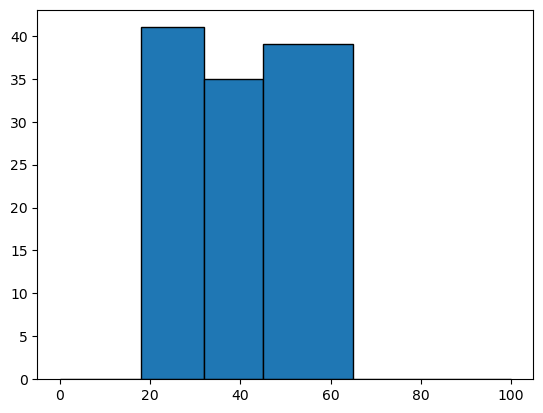

In [180]:
plt.hist(x = smoky['age'] , bins = [0,18,32,45,65,100] , ec = 'k')
plt.show()

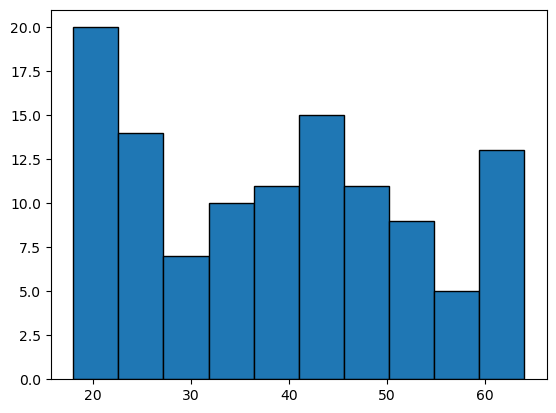

In [181]:
plt.hist(x = smoky['age'] , ec = 'k')
plt.show()

In [182]:
male_smoker = smoker[smoker['gender'] == 'male']

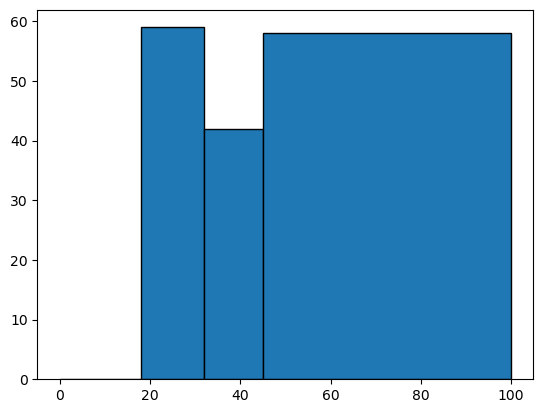

In [183]:
plt.hist(x = male_smoker['age'] , bins = [0,18,32,45,100] , ec = 'k')
plt.show()

In [184]:
d = dict(df['children'].value_counts())

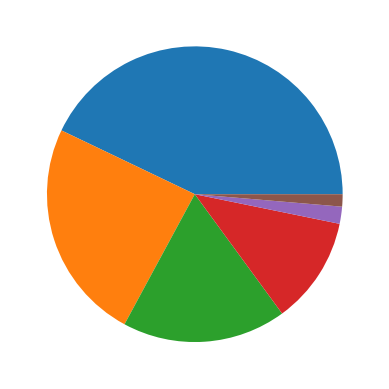

In [185]:
plt.pie(x = df['children'].value_counts())
plt.show()

In [186]:
smoker.value_counts('children')

children
0    115
1     61
2     55
3     39
4      3
5      1
dtype: int64

## DATA PREPARATION

In [187]:
cat_data = df.select_dtypes(include = 'O')

In [188]:
num_data = df.select_dtypes(exclude = 'O')

In [189]:
df = pd.get_dummies(cat_data , drop_first = 'if_binary').astype('int') 

In [190]:
df = pd.concat([df,num_data] , axis = 1)

In [191]:
x = df.drop('emi' , axis = 1)

In [192]:
x

,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,1,19,27.900,0
1,1,0,0,1,0,18,33.770,1
2,1,0,0,1,0,28,33.000,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.880,0
...,...,...,...,...,...,...,...,...
1333,1,0,1,0,0,50,30.970,3
1334,0,0,0,0,0,18,31.920,0
1335,0,0,0,1,0,18,36.850,0
1336,0,0,0,0,1,21,25.800,0


In [193]:
 y = df[['emi']]

In [194]:
y

,emi
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## MODEL SELECTION

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [198]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

## MODEL TRAINING

In [199]:
lr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train , y_train)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18584\19922401.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train , y_train)


RandomForestRegressor()

## MODEL EVALUATION

#### 1. Linear Regression 

In [200]:
lr_prediction = lr.predict(x_test)

In [201]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import numpy as np

In [202]:
lr_mse = mean_squared_error(y_test , lr_prediction)
lr_mae = mean_absolute_error(y_test , lr_prediction)
lr_rmse = np.sqrt(mse)
lr_r = r2_score(y_test , lr_prediction)
lr_adj_r = 1 - ((1-lr_r)*(y_test.shape[0]-1)/(y_test.shape[0] - x_test.shape[1] - 1))

In [203]:
print('Training accuracy:',round(lr.score(x_train,y_train),4)*100,"%") # Train Score
print('Test accuracy:',round(lr.score(x_test,y_test),4)*100,"%") # Test Score
print('Adjusted R Squared Score :', round(lr_adj_r,4)*100,'%\n')
print('Mean Square Error :', lr_mse)
print('Mean Absolute Error :', lr_mae)
print('Root Mean Square Error :', lr_rmse)


Training accuracy: 74.58 %
Test accuracy: 76.62 %
Adjusted R Squared Score : 75.9 %

Mean Square Error : 38525384.92520803
Mean Absolute Error : 4196.408279720276
Root Mean Square Error : 5328.312444487357


#### 2. Decision Tree Regression

In [204]:
dt_prediction = dtr.predict(x_test)
dtr_mse = mean_squared_error(y_test , dt_prediction)
dtr_mae = mean_absolute_error(y_test , dt_prediction)
dtr_rmse = np.sqrt(dtr_mse)
dtr_r = r2_score(y_test , dt_prediction)
dtr_adj_r = 1 - ((1-dtr_r)*(y_test.shape[0]-1)/(y_test.shape[0] - x_test.shape[1] - 1))

In [205]:
print('Training accuracy:',round(dtr.score(x_train,y_train),4)*100,"%") # Train Score
print('Test accuracy:',round(dtr.score(x_test,y_test),4)*100,"%") # Test Score
print('Adjusted R Squared Score :', round(dtr_adj_r,4)*100,'%\n')
print('Mean Square Error :', dtr_mse)
print('Mean Absolute Error :', dtr_mae)
print('Root Mean Square Error :', dtr_rmse)


Training accuracy: 100.0 %
Test accuracy: 72.92999999999999 %
Adjusted R Squared Score : 72.09 %

Mean Square Error : 44605900.85530127
Mean Absolute Error : 3185.9717594402982
Root Mean Square Error : 6678.764919901079


#### 3. Random Forest Regression

In [206]:
rf_prediction = rfr.predict(x_test)
rfr_mse = mean_squared_error(y_test , rf_prediction)
rfr_mae = mean_absolute_error(y_test , rf_prediction)
rfr_rmse = np.sqrt(rfr_mse)
rfr_r = r2_score(y_test , rf_prediction)
rfr_adj_r = 1 - ((1-rfr_r)*(y_test.shape[0]-1)/(y_test.shape[0] - x_test.shape[1] - 1))

In [207]:
print('Training accuracy:',round(rfr.score(x_train,y_train),4)*100,"%") # Train Score
print('Test accuracy:',round(rfr.score(x_test,y_test),4)*100,"%") # Test Score
print('Adjusted R Squared Score :', round(rfr_adj_r,4)*100,'%\n')
print('Mean Square Error :', rfr_mse)
print('Mean Absolute Error :', rfr_mae)
print('Root Mean Square Error :', rfr_rmse)

Training accuracy: 97.65 %
Test accuracy: 86.15 %
Adjusted R Squared Score : 85.72 %

Mean Square Error : 22829341.834320392
Mean Absolute Error : 2629.905939004329
Root Mean Square Error : 4778.00605214355
